In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
import numpy as np
import math

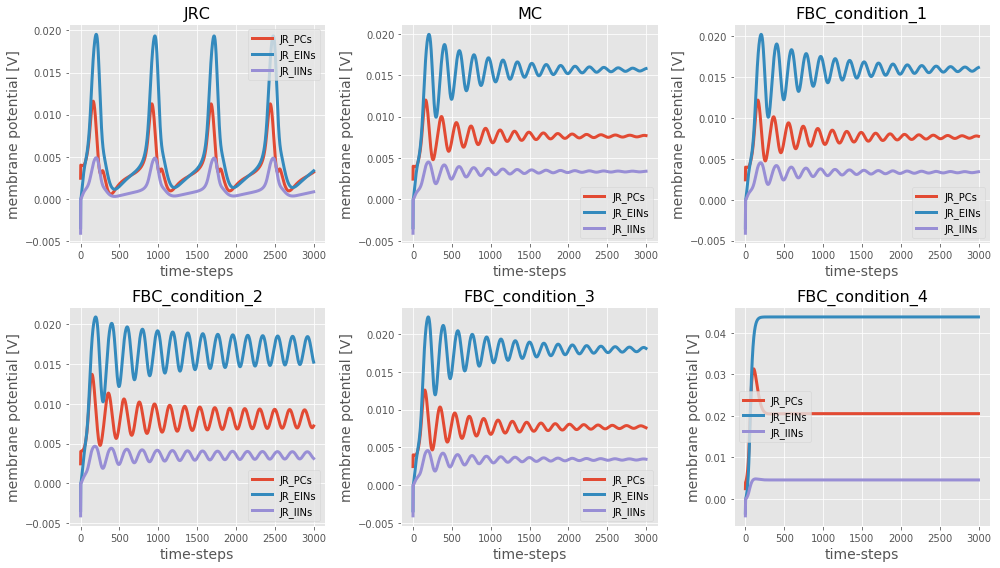

In [11]:
from core.circuit import JansenRitFeedbackCircuit

############################################
# experiment 1: input strength bifurcation #
############################################

# parameters
############

# basic circuit parameters
n_populations = 3
n_synapses = 2
coupling_strength = 135.
jrc_feedback_strength = np.zeros(n_populations)
mc_feedback_strength = np.array([0., 0., 0.01])
step_size = 5e-4
max_synaptic_delay = 0.9
init_states = 0.005 * np.random.randn(3)

# experimental conditions
input_strengths = [4e-3]
fbc_feedback_strengths = np.array([[0.01, 0.01, 0.01],
                                   [0.1, 0.01, 0.01],
                                   [0.01, 0.1, 0.01],
                                   [1., 1., 0.01]])
n_circuits = 6

# simulation parameters
simulation_time = 1.5
simulation_steps = int(simulation_time/step_size)
synaptic_input = np.zeros((simulation_steps, n_populations, n_synapses))
extrinsic_input = np.zeros((simulation_steps, n_populations))

# plotting parameters
pops = [0, 1, 2]
start = 0.
end = simulation_time

# instantiate jansen-rit and moran circuit

jrc = JansenRitFeedbackCircuit(connectivity_scaling=coupling_strength,
                               feedback_strength=jrc_feedback_strength,
                               step_size=step_size,
                               max_synaptic_delay=max_synaptic_delay,
                               init_states=init_states)
mc = JansenRitFeedbackCircuit(connectivity_scaling=coupling_strength,
                              feedback_strength=mc_feedback_strength,
                              step_size=step_size,
                              max_synaptic_delay=max_synaptic_delay,
                              init_states=init_states)

# perform experiment
for inp in input_strengths:
    
    fig, axes = plt.subplots(2, 3, figsize=(14,8))
    
    extrinsic_input[:, 0] = inp
    
    jrc.run(synaptic_input, simulation_time, extrinsic_current=extrinsic_input)
    mc.run(synaptic_input, simulation_time, extrinsic_current=extrinsic_input)
    
    axes[0, 0] = jrc.plot_population_states(pops, create_plot=False, axes=axes[0, 0], time_window=[start, end])
    axes[0, 0].set_title('JRC')
    axes[0, 1] = mc.plot_population_states(pops, create_plot=False, axes=axes[0, 1], time_window=[start, end])
    axes[0, 1].set_title('MC')
    
    jrc.clear()
    mc.clear()
    
    for i, fb in enumerate(fbc_feedback_strengths):


        fbc = JansenRitFeedbackCircuit(connectivity_scaling=coupling_strength,
                                       feedback_strength=fb,
                                       step_size=step_size,
                                       max_synaptic_delay=max_synaptic_delay,
                                       init_states=init_states)
        
        fbc.run(synaptic_input, simulation_time, extrinsic_current=extrinsic_input)
        
        if i == 0:
            axes[0, 2] = fbc.plot_population_states(pops, create_plot=False, axes=axes[0, 2], time_window=[start, end])
            axes[0, 2].set_title('FBC_condition_1')
        else:
            axes[1, i-1] = fbc.plot_population_states(pops, create_plot=False, axes=axes[1, i-1], time_window=[start, end])
            axes[1, i-1].set_title('FBC_condition_' + str(i+1))
            
        plt.tight_layout()